In [10]:
from scipy.stats import bernoulli, binom

def mers_aleator(pasi, p):
    nod = 0
    pozitiiNod = [0]

    for i in range(pasi):
        x = bernoulli.rvs(p)
        nod = 2 * x - 1
        pozitiiNod.append(pozitiiNod[-1]+nod)
    
    return pozitiiNod

mers_aleator(10, 0.5)

[0, 1, 2, 1, 0, 1, 2, 1, 0, -1, 0]

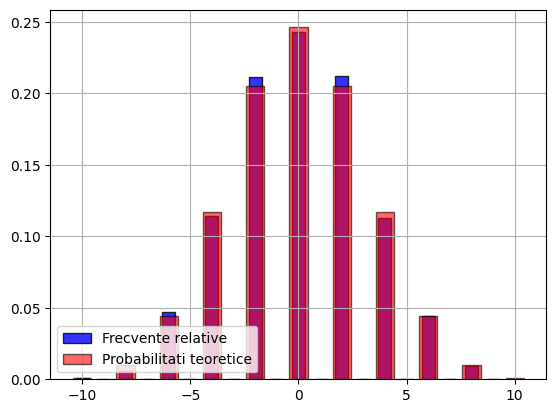

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def simulare_mers_aleator(pasi, p, sim):
    data= [mers_aleator(pasi, p)[-1] for _ in range(sim)]
    bin_edges = [k + 0.5 for k in range(-pasi-1, pasi+1)] 
    plt.hist(data, bin_edges, density=True, rwidth=0.6, color='blue', edgecolor='black', alpha=0.8, label='Frecvente relative')
    distribution = dict([(k - (pasi - k), binom.pmf(k, pasi, p)) for k in range(pasi+1)])
    plt.bar(distribution.keys(), distribution.values(), width=0.85, color='red', edgecolor='black', alpha=0.6, label='Probabilitati teoretice')

   # xticks(range(-pasi, pasi+1))
   
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

simulare_mers_aleator(10, 0.5, 1000)

IndexError: list index out of range

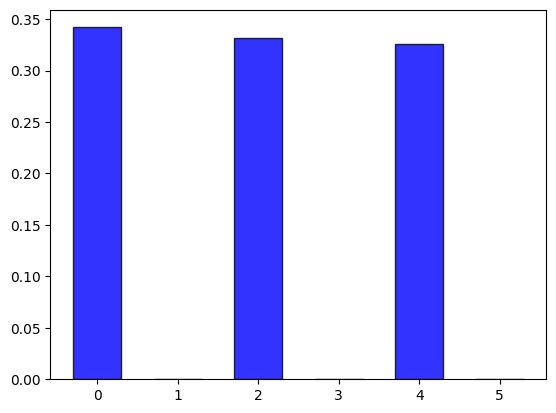

In [25]:
def simulare_mers_aleator(pasi,puncte, p, sim):
    data= [mers_aleator(pasi, p)[-1] % puncte for _ in range(sim)]
    bin_edges = [k + 0.5 for k in range(-1, puncte)] 
    plt.hist(data, bin_edges, density=True, rwidth=0.6, color='blue', edgecolor='black', alpha=0.8, label='Frecvente relative')
    distribution = puncte * [0]
    for k in range(pasi):
        distribution[k - (pasi - k)%puncte] += binom.pmf(k, pasi, p)
    plt.bar(puncte, distribution, width=0.85, color='red', edgecolor='black', alpha=0.6, label='Probabilitati teoretice')

   # xticks(range(-pasi, pasi+1))
   
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

simulare_mers_aleator(10,6, 0.5, 1000)

In [28]:
from scipy.stats import hypergeom, geom
sim = 1000
p = sum(hypergeom.pmf(k, 49, 6, 6) for k in range(3, 7))
nr_bilete_necastig = geom.rvs(p, size = sim)

prob_estim = sum([x>=10 for x in nr_bilete_necastig])/sim
probabilitateTeoretica = 1 - geom.cdf(9, p)
print("Probabilitatea teoretica: \n", probabilitateTeoretica)


Probabilitatea teoretica: 
 0.844238101245036
